In [1]:
import random
from matplotlib import pyplot as plt
from datasets import load_dataset
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image
import cv2

from config_file import config

e:\PythonProjects\Scraping Dataset\generating-annotations\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset(str(config.DATASET_PATH))
dataset = dataset["train"]
df = dataset.to_pandas()
items = random.choices(dataset, k = 9)

output_dir = config.IMAGES_PATH / "grids"
output_dir.mkdir(parents=True, exist_ok=True)

In [3]:
random.seed(69) # 2
items = random.choices(dataset, k = 9)

In [ ]:
for seed in range(1, 100 + 1):
    random.seed(seed)
    items = random.choices(dataset, k = 9)

    nrows = 3
    ncols = 3

    plt.figure(figsize=[12, 12])

    for idx, item in enumerate(items):
        plt.subplot(nrows, ncols, idx + 1)

        img = Image.open(config.DATASET_PATH / item["file_name"])
        
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout()
    # plt.savefig(output_dir / f'seed_{seed}.png', dpi=300, bbox_inches='tight')
    # plt.show()

In [4]:
frames = [
    "train#Deus Ex_ Invisible War#frame_0007.png",
    "train#Deus Ex_ Invisible War#frame_0021.png",
    "train#Deus Ex_ Invisible War#frame_0024.png",
    "train#Deus Ex_ Invisible War#frame_0187.png",
    "train#Deus Ex_ Invisible War#frame_0283.png",
    "train#Devil May Cry 3_ Dante_s Awakening#frame_0227.png",
    "train#Devil May Cry 3_ Dante_s Awakening#frame_0250.png",
    # "train#Dragon Age_ Origins#frame_0012.png",
    # "train#Dragon Age_ Origins#frame_0015.png",
    "train#Dragon Age_ Origins#frame_0437.png",
    "train#Dragon Age_ Origins#frame_0562.png",
    "train#Half-Life 2#frame_0009.png",
    "train#Half-Life 2#frame_0014.png",
    "train#Half-Life 2#frame_0482.png",
    "train#Half-Life 2#frame_0604.png",
    "train#Half-Life 2#frame_0703.png",
    "train#Half-Life 2#frame_0723.png",
    "train#Quake#frame_0172.png",
]

frames = list(map(lambda fname: fname.replace("#", "/"), frames))
items = df[df["file_name"].apply(lambda fname: fname in frames)]

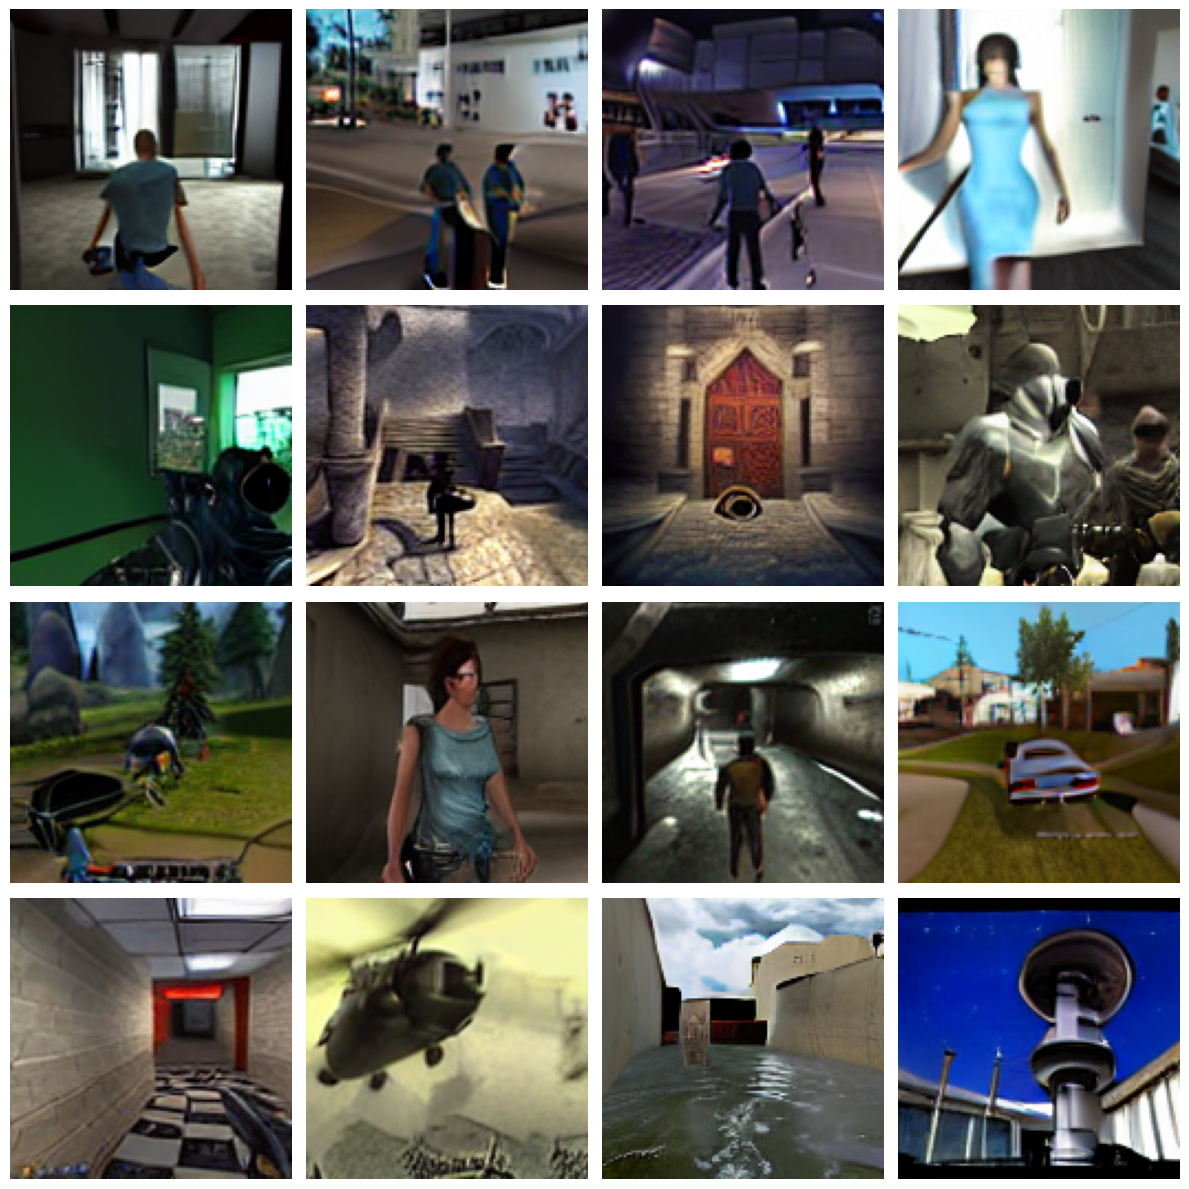

In [5]:
nrows = 4
ncols = 4

plt.figure(figsize=[12, 12])

for idx, (_, item) in enumerate(items.iterrows()):
    plt.subplot(nrows, ncols, idx + 1)

    img = Image.open(config.PROJECT_PATH / config._DATASETS_FOLDER / "flat" / "fake_batch-16_lr_1e-5_fold_1_128px" / item["file_name"].replace("/", "#"))
    
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.savefig(output_dir / f'ddpm_generated.png', dpi=300, bbox_inches='tight')
# plt.show()

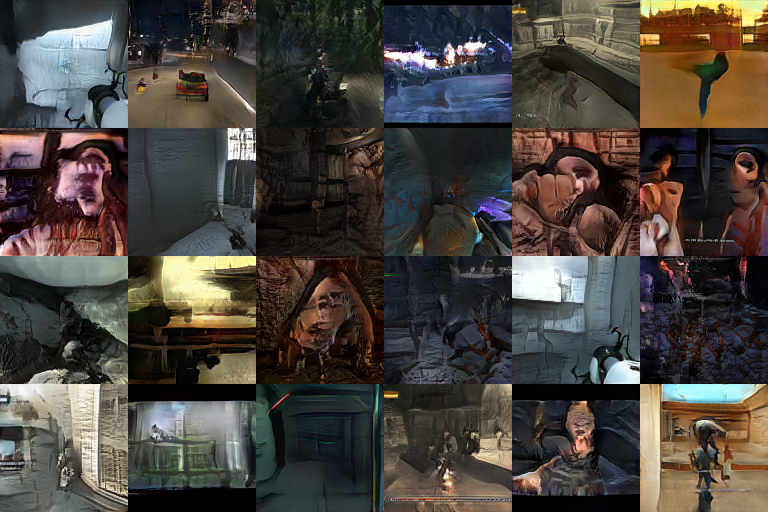

In [22]:
fname = r"F:\Checkpoints\clore-machine-gan-1\00005-vg_frames_128-auto1-kimg2500-noaug\fakes002500.png"
# fname = r"F:\Checkpoints\clore-machine-ddpm-1\generated_images\batch-16_lr_1e-5_fold_1_128px\train\Dragon Age_ Origins\frame_0067.png"
img = Image.open(fname)
# print(img_arr.shape)
# size = 128

# img.tobytes()
img_arr = np.array(img)
size = max(img_arr.shape)
img_size = 128
grid_size_row = 4
grid_size_col = 6
count = size // img_size

final_img = Image.fromarray(img_arr[size - grid_size_row * img_size:, size - grid_size_col * img_size:])
final_img.save(output_dir / 'gan_generated.png')
final_img